In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from zipfile import ZipFile
import os, glob
import cv2
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from tensorflow.keras. layers import Conv2D, Flatten,Dense,MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow. keras.preprocessing. image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow. keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    MaxPooling2D,
    Dropout,
    BatchNormalization,
    Activation,
)

<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 Move Images to the main folder 📊
</h1>

<hr style="border: 2px solid #4CAF50; width: 80%;">

<p style="text-align: center; font-size: 18px; font-family: 'Arial', sans-serif; color:#333;">
    Welcome to the data loading step! Let's dive in and prepare our dataset for exploration and model building.
</p>


<hr style="border: 1px dashed #4CAF50; width: 80%;">

<p style="text-align: center; font-size: 18px; font-family: 'Arial', sans-serif; color:#333;">
    ⚡ Time to power up the data! 💡
</p>


In [2]:
def move_and_clean_anime_images(anime_folder_path: str):
    """
    Move images from subfolders in the anime folder to the main anime folder, 
    and delete the empty subfolders. If a file with the same name exists, 
    rename the new file to avoid conflict.
    """
    anime_category = os.listdir(anime_folder_path)
    
    for category in anime_category:
        subfolder_path = os.path.join(anime_folder_path, category)
        
        # Ensure it is a directory (to avoid files or hidden items)
        if os.path.isdir(subfolder_path):
            for image in os.listdir(subfolder_path):
                image_old_path = os.path.join(subfolder_path, image)
                image_new_path = os.path.join(anime_folder_path, image)
                
                # Check if the target filename already exists
                if os.path.exists(image_new_path):
                    # Rename the file to avoid conflict
                    base, ext = os.path.splitext(image)
                    counter = 1
                    while os.path.exists(image_new_path):
                        image_new_path = os.path.join(anime_folder_path, f"{base}_{counter}{ext}")
                        counter += 1
                
                # Move the image to the anime folder
                os.rename(image_old_path, image_new_path)
            
            # Remove the empty subfolder
            os.rmdir(subfolder_path)

# Example usage
anime_folder_path = r'E:/Full Data Science Projects/Neural Netwroks/Anime Vs Cartoon/Dataset/Training Data/Anime'
move_and_clean_anime_images(anime_folder_path)


In [3]:
cartoon_folder_path = r'E:\Full Data Science Projects\Neural Netwroks\Anime Vs Cartoon\Dataset\Training Data\Cartoon'
move_and_clean_anime_images(cartoon_folder_path)

<hr style="border: 2px solid #4CAF50; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 Load the Dataset 📊
</h1>
<hr style="border: 2px solid #4CAF50; width: 80%;">



In [4]:
def load_data():
    X = []
    Y = []
    
    # Define Anime categories and corresponding folder names
    categories = ['Anime', 'Cartoon']
    base_path = r"E:\Full Data Science Projects\Neural Netwroks\Anime Vs Cartoon\Dataset\Training Data"
    
    for idx, category in enumerate(categories):
        folder_path = f"{base_path}\\{category}\\*.png"  # Path to all images in the folder
        for file in tqdm(glob.glob(folder_path)):
            img = cv2.imread(file)
            img = cv2.resize(img, (224, 224))  # Resize to desired size
            X.append(img)
            Y.append(idx)  # Append the index of the category instead of the category list
    
    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Encode labels (already in integer format, so this is optional)
    le = preprocessing.LabelEncoder()
    Y = le.fit_transform(Y)

    return X, Y, le

# Load data
X, Y, label = load_data()

100%|██████████| 3362/3362 [01:16<00:00, 43.89it/s] 


In [21]:
<hr style="border: 2px solid #4CAF50; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 Splitting the dataset📊
</h1>
<hr style="border: 2px solid #4CAF50; width: 80%;">



SyntaxError: invalid character '🚀' (U+1F680) (4249214861.py, line 3)

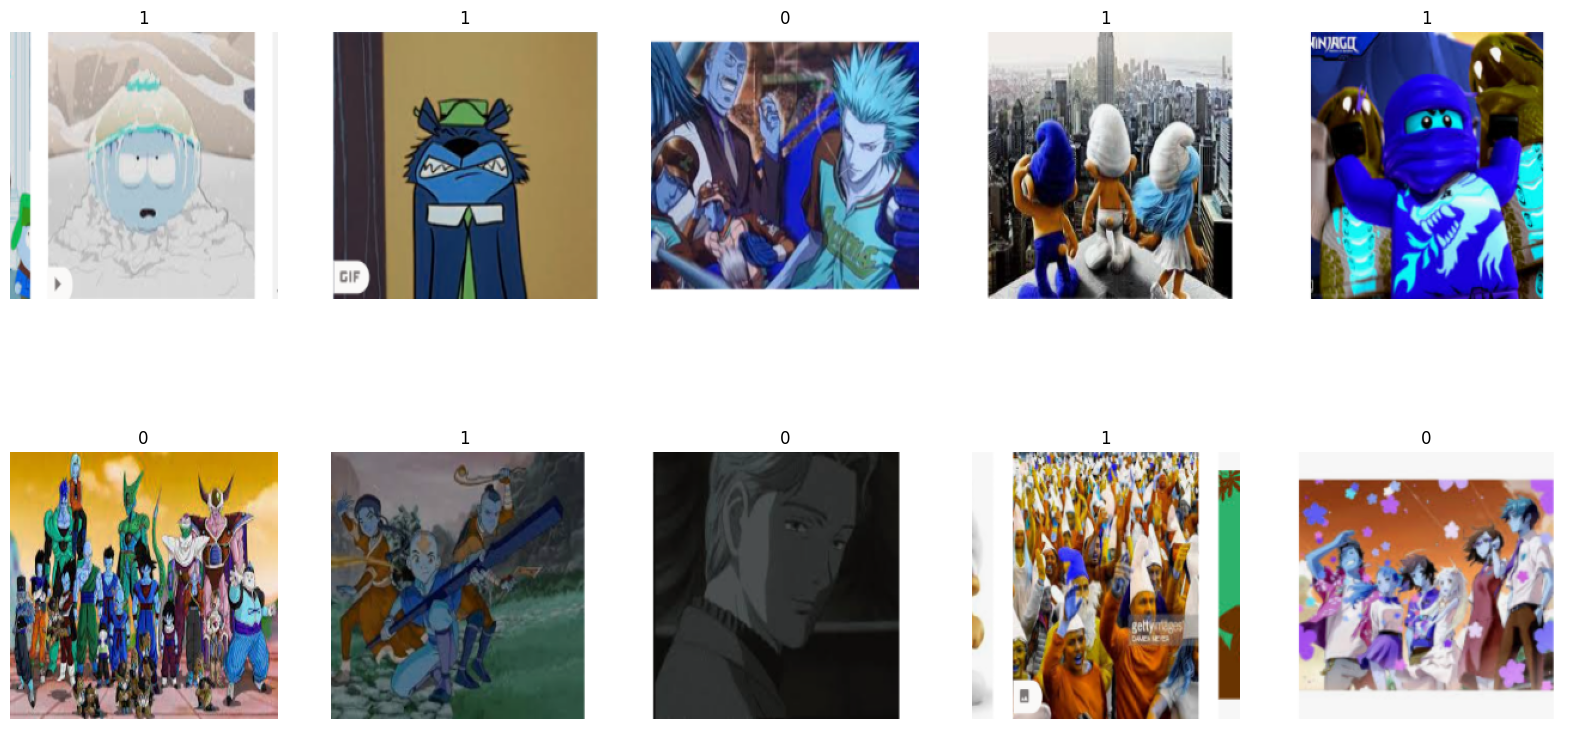

shape of X_train:  (224, 224, 3)
shape of X_test:  (224, 224, 3)
------------------------------------
number of samples in X_train:  6433
number of samples in X_test:  339


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

# plot a 10 random images with its labels
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

print("shape of X_train: ", X_train[0].shape)
print("shape of X_test: ", X_test[0].shape)
print('------------------------------------')
print("number of samples in X_train: ", len(X_train))
print("number of samples in X_test: ", len(X_test))

<hr style="border: 2px solid #4CAF50; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 CNN Archeticture (ResNet 50) 📊
</h1>
<hr style="border: 2px solid #4CAF50; width: 80%;">



In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
num_classes = 2
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x) 
predictions = Dense(num_classes, activation='softmax')(x) # adding the fully connected layer for the prediction
model = Model(inputs=base_model.input, outputs=predictions) # Combine base model and new classification layers

# Freeze base model layers (since we're using transfer learning)
for layer in base_model.layers:
    layer.trainable = False 

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)

# Augment data using ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.15, horizontal_flip=True,
                             fill_mode="nearest")

# Train the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs= 4)

Epoch 1/4


c:\Users\SAHER MOHAMED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7838 - loss: 0.4597
Epoch 2/4
202/202 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.8954 - loss: 0.2459
Epoch 3/4
202/202 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9081 - loss: 0.2283
Epoch 4/4
202/202 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9069 - loss: 0.2262


<hr style="border: 2px solid #4CAF50; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 Evaluate and Validation📊
</h1>
<hr style="border: 2px solid #4CAF50; width: 80%;">



In [9]:
#  Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy: ", accuracy_score(y_test, y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step
Accuracy:  0.9321533923303835


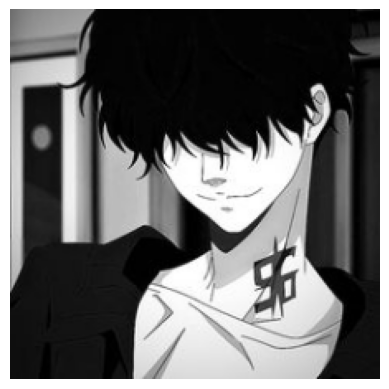

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Anime


In [15]:
path = r"E:\Full Data Science Projects\Neural Netwroks\Anime Vs Cartoon\anime.jpg"
img = cv2.imread(path)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

img = np.expand_dims(img, axis=0)# preprocess the image
img = preprocess_input(img)

pred = model.predict(img)# predict the image and make it categorical
pred = np.argmax(pred, axis=1)
if pred == 0:
    print("Anime")
else:    
    print("Cartoon")

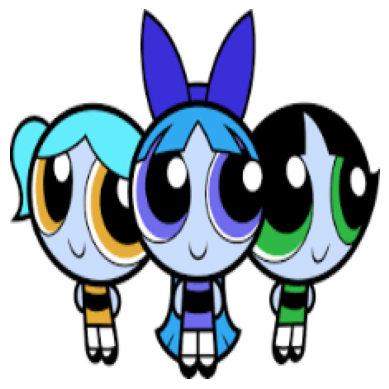

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Cartoon


In [16]:
path = r"E:\Full Data Science Projects\Neural Netwroks\Anime Vs Cartoon\cartoon.png"
img = cv2.imread(path)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

img = np.expand_dims(img, axis=0)# preprocess the image
img = preprocess_input(img)

pred = model.predict(img)# predict the image and make it categorical
pred = np.argmax(pred, axis=1)
if pred == 0:
    print("Anime")
else:    
    print("Cartoon")

<hr style="border: 2px solid #4CAF50; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#4CAF50;">
    🚀 Save the model 📊
</h1>
<hr style="border: 2px solid #4CAF50; width: 80%;">



In [17]:
model.save('model.h5') # this will save the model in h5 format

In [20]:
import pickle
with open('label.pkl', 'wb') as f:
    pickle.dump(label, f) # this will save the label encoder to disk

In [22]:
# save the resnet model to disk
model.save('resnet_model.h5')
